# 三角関数

## 三角形の辺の比による定義

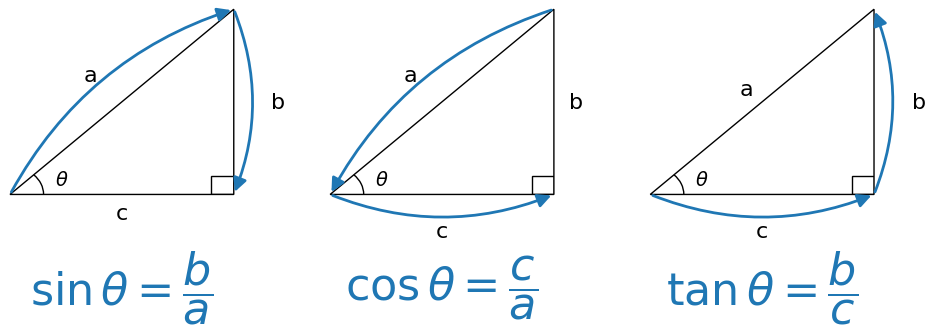

In [1]:
import numpy as np
import numpy.linalg as LA # 行列計算のため
import matplotlib.pyplot as plt
import matplotlib.patches as pat # 図形描画のため

def my_triangle(ax, points, arrow, label):
  # 三角形
  patch = pat.Polygon(xy=points, fill=False, clip_on=False)
  ax.add_patch(patch)

  # 角マーク
  ang = 45
  arc = pat.Arc(xy=points[0, :], width=0.3, height=0.3, theta1=0, theta2=ang)
  ax.add_patch(arc)

  # 角度ラベル
  ax.annotate(r'$\theta$', xy=points[0, :], xytext=points[0, :]+np.array([0.2, 0.05]), size=14)

  # 直角マーク
  rec_size = 0.1
  rec = pat.Rectangle(xy=points[1, :]-np.array([rec_size, 0]), width=rec_size, height=rec_size, fill=False)
  ax.add_patch(rec)

  # 辺ラベル
  for p1_num, p2_num, arrow, text in arrows:
    # 辺を描くための２点
    p1 = points[p1_num, :]
    p2 = points[p2_num, :]
    
    # 辺p1p2の中点
    p4 = p1+(p2-p1)/2 
    # 辺Cp1を左に90度回転させた点
    p5 = np.array([[0, -1],[1, 0]]) @(p2-p4) + p4 

    # 辺ラベル
    if arrow:
      p5 = (p5-p4)/LA.norm(p5-p4)*0.2 + p4
    else:
      p5 = (p5-p4)/LA.norm(p5-p4)*0.1 + p4
    ax.text(*p5, text, size=16,
            horizontalalignment='center', verticalalignment='center')

    # 辺矢印
    if arrow:
      ax.annotate('', xy=p1, xytext=p2, arrowprops=dict(
          arrowstyle=arrow,
          linewidth=2, # width
          mutation_scale=20, # head size
          connectionstyle="arc3,rad=0.2",
          color='tab:blue'
          ), annotation_clip=False)

  ax.text(0.5, -0.5, label,
          size = 32,
          color = 'tab:blue',
          horizontalalignment='center', verticalalignment='center')

  # 枠を消す
  ax.axis("off")

fig, ax = plt.subplots(1, 3, figsize=(10,5))

## sin
points = np.array([
    [0, 0],
    [1, 0],
    [1, 1]
])
arrows = [
    [1, 0, None, 'c'],
    [2, 1, '<|-', 'b'],
    [0, 2, '<|-', 'a']
]
label = r'$\sin \theta = \dfrac{b}{a}$'
my_triangle(ax[0], points, arrows, label)

## cos
points = np.array([
    [0, 0],
    [1, 0],
    [1, 1]
])
arrows = [
    [1, 0, '-|>', 'c'],
    [2, 1, None, 'b'],
    [0, 2, '-|>', 'a']
]
label = r'$\cos \theta = \dfrac{c}{a}$'
my_triangle(ax[1], points, arrows, label)

## tan
points = np.array([
    [0, 0],
    [1, 0],
    [1, 1]
])
arrows = [
    [1, 0, '-|>', 'c'],
    [2, 1, '-|>', 'b'],
    [0, 2, None, 'a']
]
label = r'$\tan \theta = \dfrac{b}{c}$'
my_triangle(ax[2], points, arrows, label)

fig.tight_layout(pad = 3.0)
plt.show()

## 単位円による定義

単位円上の点$P(x,y)$と$x$軸の作る角$\theta$を使うと、三角関数は以下のように表せられる。

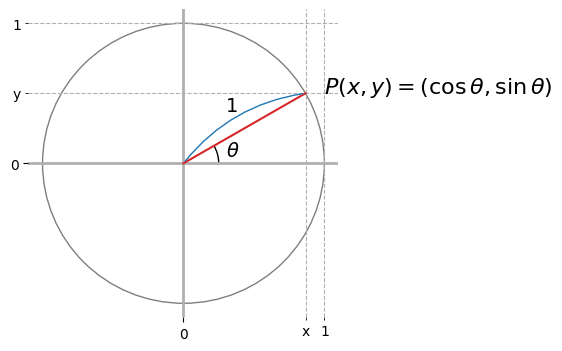

In [2]:
import numpy as np
import numpy.linalg as LA # 行列計算のため
import matplotlib.pyplot as plt
import matplotlib.patches as pat # 図形描画のため

radius = 1.0
angle = 30
theta = np.deg2rad(angle)
x = np.cos(theta)*radius
y = np.sin(theta)*radius

fig, ax = plt.subplots(figsize=(4,4))

# 円
circle = pat.Circle(xy=(0,0), radius=radius, fill=False, color='tab:gray')
ax.add_patch(circle)

# 斜線
ax.plot([0,x], [0,y], color='tab:red')

# 角マーク
size = 0.5
arc = pat.Arc(xy=(0,0), width=size, height=size, theta1=0, theta2=angle)
ax.add_patch(arc)
ax.annotate(r'$\theta$', xy=(0, 0), xytext=(0, 0)+np.array([0.3, 0.05]), size=14)

# 半径 annotation
ax.annotate('', arrowprops=dict(
                arrowstyle='-',
                connectionstyle="arc3,rad=0.2",
                color='tab:blue'
            ),
            xy=(0, 0), xytext=(x, y),
            annotation_clip=False)
ax.text(x=x*0.35, y=y*0.75, s=1, size=14)
# 点P annotation
ax.annotate(r'$P(x,y)=(\cos \theta, \sin \theta)$',
            size=16, 
            xy=(x, y), xytext=(1, y),
            annotation_clip=False)

# 軸
ax.set_xticks([0])
ax.set_xticks([x, 1], minor=True)
ax.set_xticklabels(['x', 1], minor=True)
ax.set_yticks([0])
ax.set_yticks([y, 1], minor=True)
ax.set_yticklabels(['y', 1], minor=True)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.grid(linewidth=2)
ax.grid(which='minor', linestyle='--')

# 枠を消す
# ax.axis("off")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

$$
\sin \theta = y\\
\cos \theta = x\\
\tan \theta = \dfrac{y}{x} = \dfrac{\sin \theta}{\cos \theta}
$$

```{note}
sin(正弦)…正角（注目している角）に対する弦の長さ  
cos(余弦)…余角（正角・直角以外の角）に対する弦の長さ  
tan(正接)…正角に対する接線の長さ  
```

## 公式

$$
\sin^2 \theta + \cos^2 \theta = 1\\
\tan^2 \theta + 1 = \dfrac{1}{\cos^2 \theta}\\
$$ 

導出は、
- 円の方程式$x^2+y^2=1$に$x=\cos \theta$, $y=\sin \theta$を代入
- $\sin^2 \theta+\cos^2 \theta=1$を$\cos^2 \theta$を割る

::::{grid} 2
:::{grid-item}
$$
\sin(90^{\circ}-\theta)=\cos \theta\\
\sin(90^{\circ}+\theta)=\cos \theta\\
\sin(180^{\circ}+\theta)=-\sin \theta
$$
:::
:::{grid-item}
$$
\cos(90^{\circ}-\theta)=\sin \theta\\
\cos(90^{\circ}+\theta)=-\sin \theta\\
\cos(90^{\circ}+\theta)=-\cos \theta
$$
:::
::::

## 加法定理

$$
\sin(\alpha + \beta) = \sin \alpha \cos \beta + \cos \alpha \sin \beta\\

\sin(\alpha - \beta) = \sin \alpha \cos \beta - \cos \alpha \sin \beta\\

\cos(\alpha + \beta) = \cos \alpha \cos \beta - \sin \alpha \sin \beta\\

\cos(\alpha - \beta) = \cos \alpha \cos \beta + \sin \alpha \sin \beta\\

\tan(\alpha + \beta) = \dfrac{\tan \alpha + \tan \beta}{1-\tan \alpha \tan \beta}\\

\tan(\alpha - \beta) = \dfrac{\tan \alpha - \tan \beta}{1+\tan \alpha \tan \beta}\\
$$

### 導出



## 正弦定理

角と正弦と、外接円の半径の関係式

$\triangle ABC$において$AB=c, BC=a, CA=b$とする。  
$\angle ABC=B, \angle BCA=C, \angle CAB=A$とする。  
$\triangle ABC$の外接円の半径を$R$とする。

$$
\dfrac{a}{\sin A} = 
\dfrac{b}{\sin B} = 
\dfrac{c}{\sin C} = 2R
$$

### 例題：１角２辺の情報から他辺を求める

> a = 4, A = 30º, B = 105º のとき、c の値を求めよ。  
> -- [スタディクラブ](https://study-club.jp/news/seigen-yogen/)

$$
\angle C = 180^{\circ} - (30+105) = 45^{\circ}\\
$$

正弦定理より、

$$
\dfrac{a}{\sin A} = 
\dfrac{c}{\sin C}\\
=
\dfrac{4}{\sin 30^{\circ}} = 
\dfrac{c}{\sin 45^{\circ}}\\
\therefore
c = \dfrac{4}{\sin 30^{\circ}}\times \sin 45^{\circ}\\
= \dfrac{4\cdot 2}{\sqrt{2}}\\
= 4 \sqrt{2}
$$

## 余弦定理

隣接する２辺の長さとその間の角、残りの辺の長さの関係式。

$\triangle ABC$において$AB=c, BC=a, CA=b$とする。  
$\angle ABC=B, \angle BCA=C, \angle CAB=a$とする。  

$$
c^2 = a^2 + b^2 - 2ab \cos C\\
a^2 = b^2 + c^2 - 2bc \cos A\\
b^2 = c^2 + a^2 - 2ca \cos B
$$

### 例題：２辺１角の情報から他辺を求める

> $a = 3, b = 5, C = 60^{\circ}$ のとき、$c$ を求めよ。  
> -- [スタディクラブ](https://study-club.jp/news/seigen-yogen/)

$$
c^2=a^2+b^2-2ab \cos Cより、\\
c^2 = 3^2+5^2-2\cdot 3 \cdot 5 \cdot \cos 60^{\circ}\\
=9+25-30 \dfrac{1}{2}\\
=34-15\\
= 19\\
\therefore c = \sqrt{19}
$$

## 極限

$$
\lim_{x\to 0}\dfrac{\sin x}{x}=1\\
\lim_{x\to 0}\dfrac{x}{\sin x}=1\\
\lim_{x\to 0}\dfrac{\tan x}{x}=1\\
\lim_{x\to 0}\dfrac{x}{\tan x}=1\\
\lim_{x\to 0}\dfrac{1- \cos x}{x^2}=\dfrac{1}{2}\\
\lim_{x\to 0}\dfrac{x^2}{1- \cos x}=2\\

$$

## 微分

$$
(\sin x)' = \cos x\\
(\cos x)' = -\sin x\\
(\tan x)' = \dfrac{1}{\cos^2 x}
$$

### 導出

$$
(\sin x)' = \lim_{h \to 0} \dfrac{\sin(x+h) - \sin x}{h}
$$

加法定理$\sin(x+\alpha)=\sin x \cos \alpha + \cos x \sin \alpha$を使って

$$
(\sin x)' = 
\lim_{h \to 0} \dfrac{\sin x \cos h + \cos x \sin h - \sin x}{h}\\
\lim_{h \to 0} \dfrac{\sin x (\cos h -1) + \cos x \sin h}{h}\\

\lim_{h \to 0} 
\dfrac{\sin x (\cos h -1) }{h} + 
\dfrac{\cos x \sin h}{h}\\

\lim_{h \to 0} 
\dfrac{1 - \cos h}{h^2}(- h \sin x) + 
\dfrac{\sin h}{h}\cos x\\
$$

ここで極限の公式
$\lim_{x\to 0}\dfrac{\sin x}{x}=1$, 
$\lim_{x\to 0}\dfrac{1- \cos x}{x^2}=\dfrac{1}{2}$を使うと、

$$
(\sin x)' = 
\dfrac{1}{2} \cdot 0 + 1 \cdot \cos x\\
=\cos x
$$

よって $(\sin x)' = \cos x$が導かれる。